In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:\PLD_3_Classes_256\Training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3251 files belonging to 3 classes.


In [4]:
class_labels=dataset.class_names
class_labels

['Early_Blight', 'Healthy', 'Late_Blight']

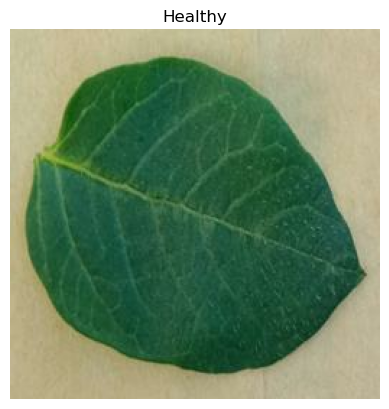

In [7]:
import numpy
for i,j in dataset.take(1):
    plt.imshow(i[0].numpy().astype("uint8"))
    plt.title(class_labels[j[0]])
    plt.axis("off")

In [14]:

input_shape=[32,IMAGE_SIZE,IMAGE_SIZE,CHANNELS]
n_class=3

In [8]:
def data_part(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
        
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,test_ds,val_ds
        


In [9]:
train_ds,test_ds,val_ds=data_part(dataset)

In [10]:
norm=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                          layers.experimental.preprocessing.Rescaling(1.0/255)])

In [12]:
augment=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                          ])

In [15]:
model=models.Sequential([norm,augment])
# model.add(layers.experimental.preprocessing.RandomRotation(0.2))
model.add(layers.Convolution2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Convolution2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Convolution2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Convolution2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Convolution2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Convolution2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(n_class,activation='softmax'))

model.build(input_shape=input_shape)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model=tf.keras.models.load_model("E:\leafdisesasepred_cnn_model1")

In [20]:
model_fit=model.fit(train_ds,epochs=2,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/2
81/81 [==============================] - 94s 1s/step - loss: 0.0906 - accuracy: 0.9678 - val_loss: 0.2723 - val_accuracy: 0.9250
Epoch 2/2
81/81 [==============================] - 97s 1s/step - loss: 0.0917 - accuracy: 0.9709 - val_loss: 0.1692 - val_accuracy: 0.9438


In [21]:
scores=model.evaluate(test_ds)

11/11 [==============================] - 4s 270ms/step - loss: 0.1872 - accuracy: 0.9233


In [22]:
scores

[0.18715538084506989, 0.9233038425445557]

first image to predict
actual label :  Late_Blight
1/1 [==============================] - 0s 282ms/step
prediction from model developed :  Late_Blight


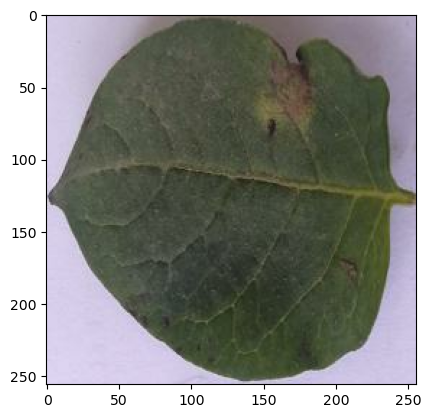

In [31]:
import numpy as np
for imgbatch,labelbatch in dataset.take(1):
    first_img=imgbatch[0].numpy().astype("uint8")
    first_img_label=class_labels[labelbatch[0]]
    print("first image to predict")
    plt.imshow(first_img)
    print("actual label : ", first_img_label)
    
    batch_pred=model.predict(imgbatch)
    print("prediction from model developed : ",class_labels[np.argmax(batch_pred[0])])

In [32]:
model_development_version=2
model.save(f"E:\leafdisesasepred_cnn_model{model_development_version}")

INFO:tensorflow:Assets written to: E:\leafdisesasepred_cnn_model2\assets


INFO:tensorflow:Assets written to: E:\leafdisesasepred_cnn_model2\assets
